# Data Science Fundamentals Project

Welcome to our data science project focused on predicting NO2 concentrations. We're using advanced analytics and machine learning to forecast NO2 levels based on a range of features, from meteorological conditions to human activities. Our goal is to contribute to environmental sustainability by developing a precise predictive model.

In [2]:
# Load all of the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [10]:
import os
cwd = os.getcwd()
print("Current working directory: {0}".format(cwd))

PermissionError: [Errno 1] Operation not permitted

## Datasets
For our prediction, the following datasets are necessary:

- 1: Täglich aktualisierte Luftqualitätsmessungen, seit 1983
   - https://data.stadt-zuerich.ch/dataset/ugz_luftschadstoffmessung_tageswerte
- 2: Daten der Verkerzählung zum motorisierten Individualverkehr (Stundenwerte), seit 2012
   - https://data.stadt-zuerich.ch/dataset/sid_dav_verkehrszaehlung_miv_od2031
- 3: Täglich aktualisierte Meteodaten, seit 1992
   - https://data.stadt-zuerich.ch/dataset/ugz_meteodaten_tagesmittelwerte
- 4: Baumkataster
   - https://data.stadt-zuerich.ch/dataset/geo_baumkataster


We decided to make predictions on a daily basis, as to not be too granular with our prediction.

## Preprocessing
The first step was to merge all of the datasets to be able to predict NO2 well with the other columns. 

Dataset 1, that measures the airquality with different features, was also established by merging 12 datasets with numbers from 2012 to 2023.

Dataset 2, that counts the passing cars, was established by merging the 12 individual datasets that include the data from 2012 to 2023.

Dataset 3, <span style="color:red">[INSERT DESCRIPTION]</span>

Dataset 4, that counts all the trees and greenspaces in a 200m, 500m, 1km and 2km Radius of the weather stations by counting all the trees based on their coordinates

### Functions used for Preprocessing
- We created the function "import_and_transform_air_quality_data()" to loop over all of the years from 2012 to 2023 and merge all of the datasets while only taking into consideration the streets of interest, namely "Rosengartenstrasse", "Stampfenbachstrasse" and "Schimmelstrasse". We decided to only inspect these streets because <span style="color:red">[INSERT REASON]</span>

In [3]:
def import_and_transform_air_quality_data():
    streets = ['Zch_Rosengartenstrasse', 'Zch_Stampfenbachstrasse', 'Zch_Schimmelstrasse']
    street_dataframes = []

    for street in streets:
        yearly_data = []

        for year in range(2012, 2023):
            file_path = f'https://raw.githubusercontent.com/ninocaduff/Data-Science-Fundamentals-Project/main/data/dataset_1/ugz_ogd_air_d1_{year}.csv'
            data = pd.read_csv(file_path)

            # Filter for a specific street
            street_data = data[data['Standort'] == street]

            # Pivot the data
            street_wide = street_data.pivot(index='Datum', columns='Parameter', values='Wert')

            # Add the year and street columns
            street_wide['Year'] = year
            street_wide['Street'] = street

            yearly_data.append(street_wide)

        # Concatenate all years' data for the street
        combined_street_data = pd.concat(yearly_data)
        street_dataframes.append(combined_street_data)

    # Concatenate all streets' data into one DataFrame
    combined_data = pd.concat(street_dataframes)

    return combined_data


The cell below saves the 12 airquality datasets into one big dataset

In [4]:
airquality = import_and_transform_air_quality_data()
#airquality.to_csv('airquality.csv')

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1000)>

- Another function we created is "import_and_transform_traffic_data()", which handles the preprocessing for datset 2 in a similar fashion as the function above.

In [5]:
def import_and_transform_traffic_data():
    streets = ['Stampfenbachstrasse (Wasserwerkstrasse)', 'Schimmelstrasse (Werdstrasse)', 'Rosengartenstrasse']
    street_dataframes = []

    for street in streets:
        yearly_data = []

        for year in range(2012, 2023):
            file_path = f'https://data.stadt-zuerich.ch/dataset/sid_dav_verkehrszaehlung_miv_od2031/download/sid_dav_verkehrszaehlung_miv_OD2031_{year}.csv'
            traffic = pd.read_csv(file_path)

            # Drop unnecessary columns and filter for a specific street
            traffic_small = traffic.drop(columns=['MSID', 'MSName', 'Hoehe', 'EKoord', 'NKoord', 'AnzDetektoren', 'D1ID', 'D2ID', 'D3ID','D4ID', 'Knummer', 'ZSID'])
            traffic_rg = traffic_small[traffic_small['ZSName'] == street]

            # Convert 'MessungDatZeit' column to datetime
            try:
                traffic_rg['MessungDatZeit'] = pd.to_datetime(traffic_rg['MessungDatZeit'])
            except pd.errors.OutOfBoundsDatetime:
                # Handle conversion errors, for example, if the data contains unexpected values
                print(f"Error converting 'MessungDatZeit' column for year {year} and street {street}")

            # Aggregate data
            daily_traffic = traffic_rg.groupby(traffic_rg['MessungDatZeit'].dt.date)['AnzFahrzeuge'].sum().reset_index(name='TotalDailyTraffic')
            daily_traffic['Year'] = year
            daily_traffic['Street'] = street

            yearly_data.append(daily_traffic)

        # Concatenate all years' data for the street
        combined_street_data = pd.concat(yearly_data)
        street_dataframes.append(combined_street_data)

    # Concatenate all streets' data into one DataFrame
    combined_data = pd.concat(street_dataframes)

    return combined_data


The cell below saves the 12 traffic datasets into one big dataset

In [6]:
traffic = import_and_transform_traffic_data()
traffic.to_csv('traffic.csv')

C:\Users\ninoc\AppData\Local\Temp\ipykernel_13916\2242616960.py:10: DtypeWarning: Columns (5,14) have mixed types. Specify dtype option on import or set low_memory=False.
  traffic = pd.read_csv(file_path)
C:\Users\ninoc\AppData\Local\Temp\ipykernel_13916\2242616960.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_rg['MessungDatZeit'] = pd.to_datetime(traffic_rg['MessungDatZeit'])
C:\Users\ninoc\AppData\Local\Temp\ipykernel_13916\2242616960.py:10: DtypeWarning: Columns (5,14) have mixed types. Specify dtype option on import or set low_memory=False.
  traffic = pd.read_csv(file_path)
C:\Users\ninoc\AppData\Local\Temp\ipykernel_13916\2242616960.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

KeyboardInterrupt: 

Now, we have two big datasets with all of the relevant data from years 2012 to 2023. To be able to merge them we do the steps in the cell below.

In [7]:
airquality = pd.read_csv('https://raw.githubusercontent.com/ninocaduff/Data-Science-Fundamentals-Project/main/data/dataset_1/airquality.csv')
traffic = pd.read_csv('https://raw.githubusercontent.com/ninocaduff/Data-Science-Fundamentals-Project/main/data/dataset_2/traffic.csv')

# Convert the 'Datum' column in air quality data to datetime and extract the date
airquality['Datum'] = pd.to_datetime(airquality['Datum']).dt.date

# Replace street names in traffic data to match the air quality data
traffic.replace(['Stampfenbachstrasse (Wasserwerkstrasse)', 'Schimmelstrasse (Werdstrasse)', 'Rosengartenstrasse'],
                ['Zch_Stampfenbachstrasse', 'Zch_Schimmelstrasse', 'Zch_Rosengartenstrasse'], inplace=True)

# Rename the 'MessungDatZeit' column in traffic data to 'Datum'
traffic.rename(columns={'MessungDatZeit': 'Datum'}, inplace=True)

#### Merging of the two datasets

In [8]:
merged_df = pd.merge(traffic, airquality, how="left", on=['Datum', 'Street'])
merged_df.drop(columns=['Year_x', 'Year_y'], inplace=True)

The cell below saves the big traffic and airquality dataset into one dataset.

In [9]:
merged_df.to_csv('merged_df.csv')

### Modification of Merged Dataset
Now that we have many of the necessary features inside of one dataset, we want to add some more that could make our prediction model more accurate. For that we turned to meteo data, which is dataset 3.

<span style="color:red">[PLEASE EXPLAIN WHY PM2.5, CO, ... ARE DROPPED]</span>




In [1]:
merged_df = pd.read_csv('https://raw.githubusercontent.com/ninocaduff/Data-Science-Fundamentals-Project/main/data/merged_df.csv')
merged_df.drop(columns=merged_df[['PM2.5', 'CO', 'SO2', 'PN']], inplace=True) 


NameError: name 'pd' is not defined

<span style="color:red">[PLEASE EXPLAIN WHY WE PLOT THE DATA BELOW]</span>

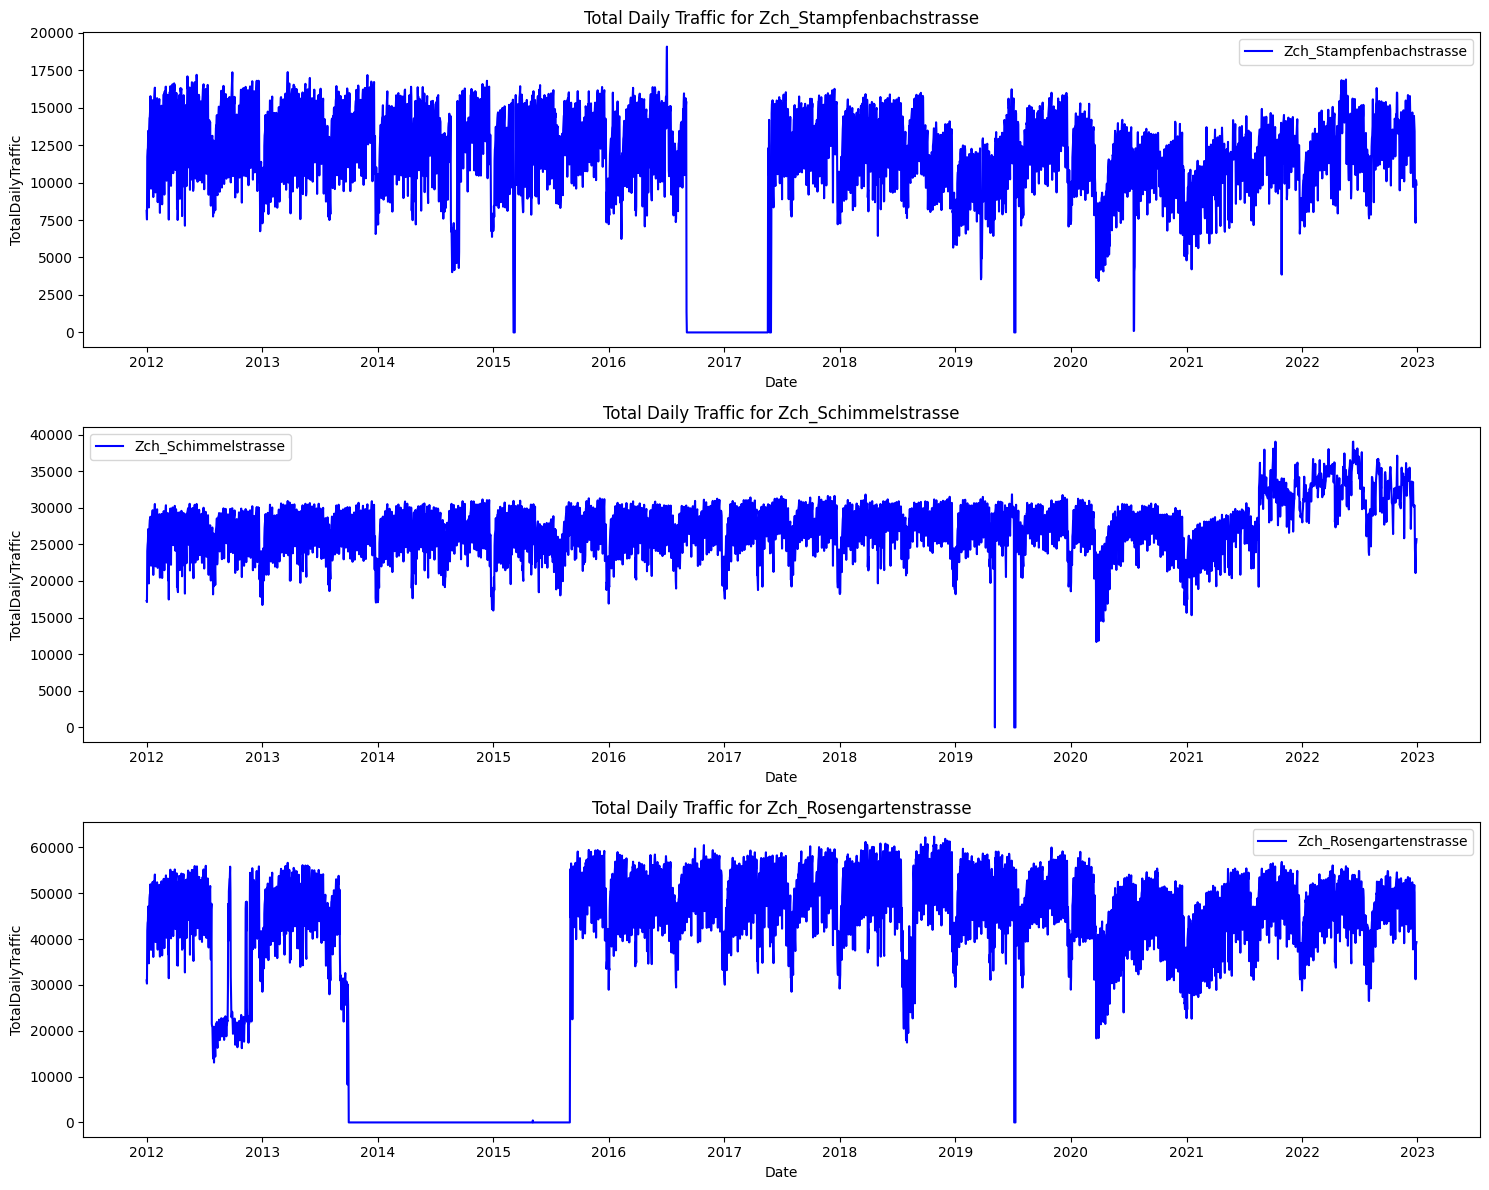

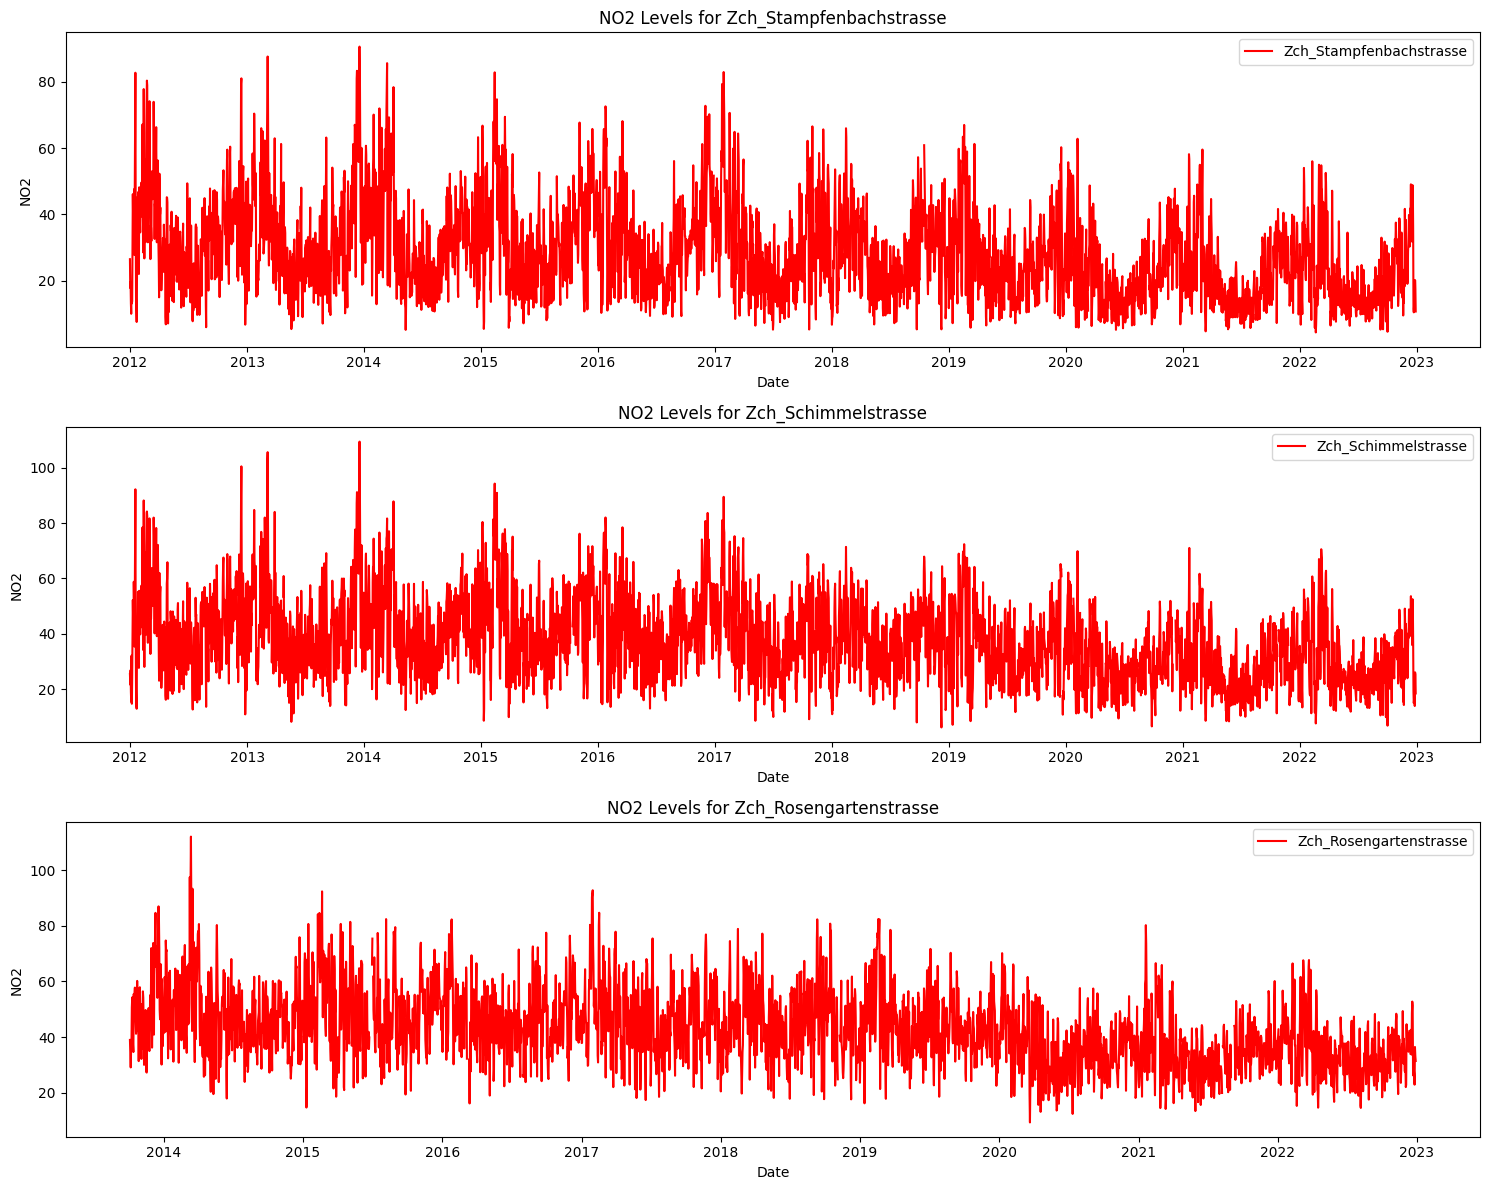

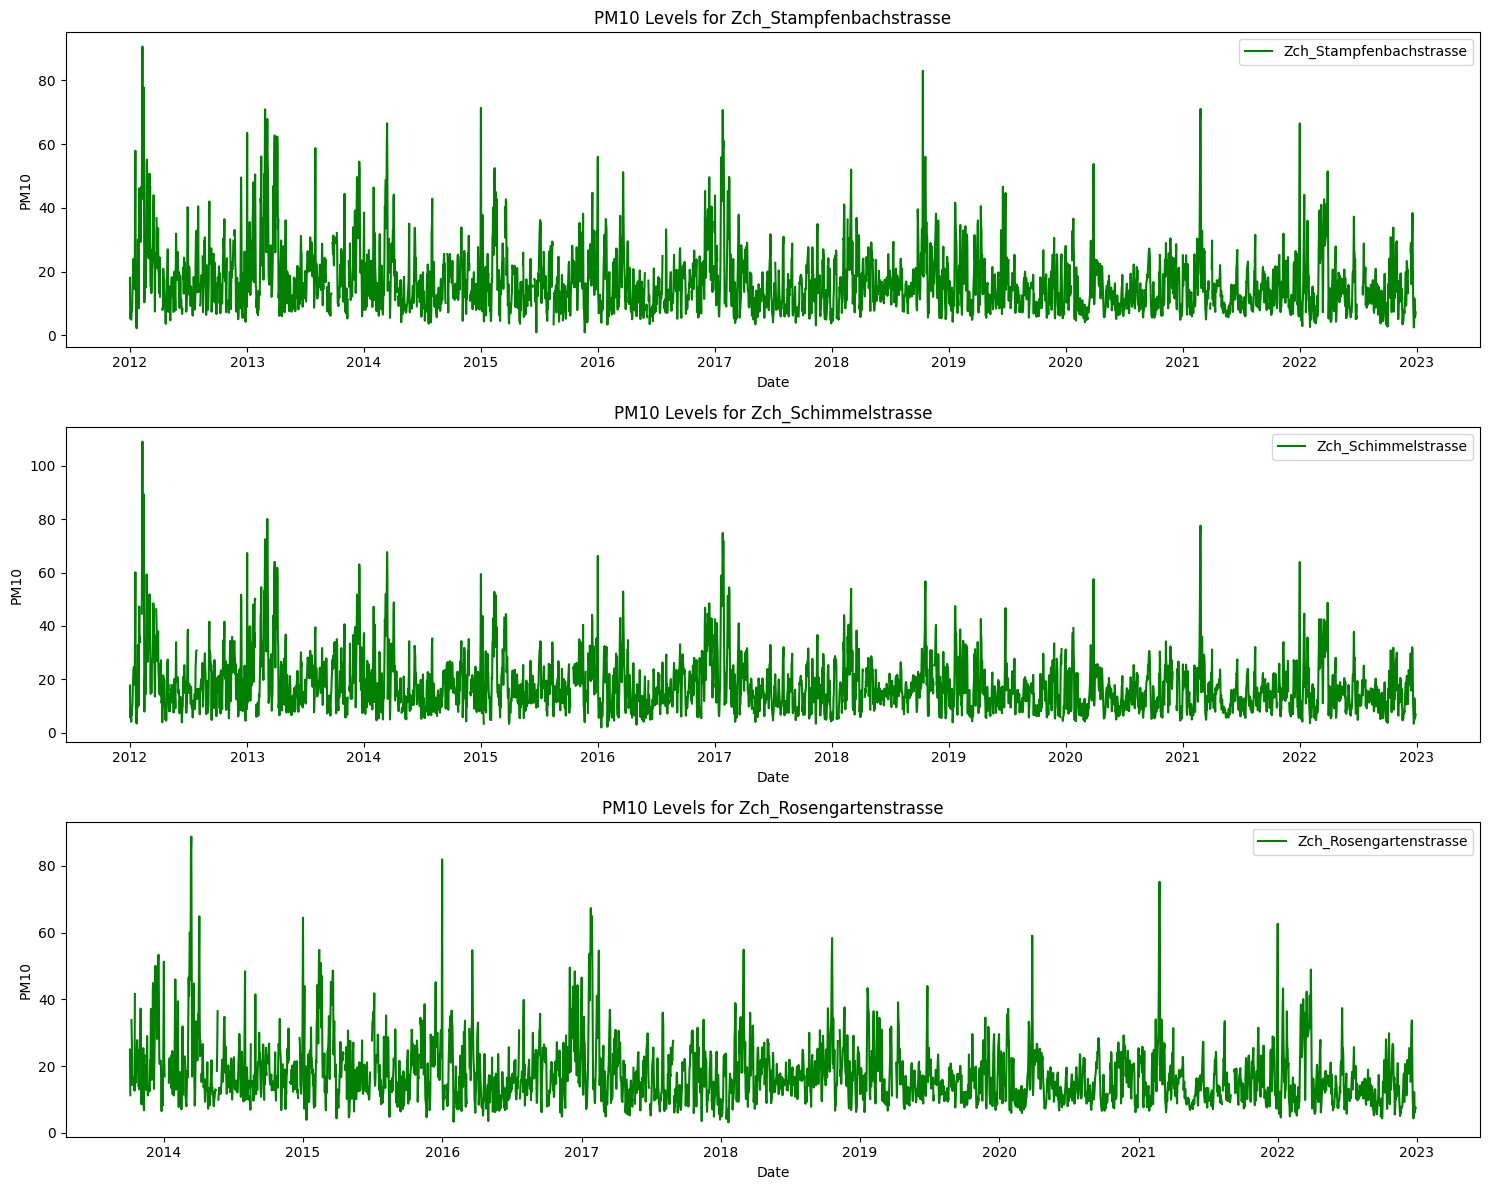

In [11]:
# Including 'Street' in the subset for plotting
merged_df['Datum'] = pd.to_datetime(merged_df['Datum'])
time_series_data_with_street = merged_df[['Datum', 'Street', 'TotalDailyTraffic', 'NO2', 'PM10']]

# Function to plot time series for each unique street
def plot_time_series_for_streets(data, column, title, color):
    streets = data['Street'].unique()
    n_streets = len(streets)

    # Creating subplots for each street
    fig, axs = plt.subplots(n_streets, 1, figsize=(15, 4 * n_streets))

    for i, street in enumerate(streets):
        street_data = data[data['Street'] == street]
        axs[i].plot(street_data['Datum'], street_data[column], label=street, color=color)
        axs[i].set_title(f'{title} for {street}')
        axs[i].set_xlabel('Date')
        axs[i].set_ylabel(column)
        axs[i].legend()
        axs[i].xaxis.set_major_locator(mdates.YearLocator())
        axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

    # Adjusting layout
    plt.tight_layout()

    # Showing the plots
    plt.show()

# Plotting time series for 
plot_time_series_for_streets(time_series_data_with_street, 'TotalDailyTraffic', 'Total Daily Traffic', 'blue')
plot_time_series_for_streets(time_series_data_with_street, 'NO2', 'NO2 Levels', 'red')
plot_time_series_for_streets(time_series_data_with_street, 'PM10', 'PM10 Levels', 'green')

In [12]:
def import_and_transform_meteo_data():
    streets = ['Zch_Rosengartenstrasse', 'Zch_Stampfenbachstrasse', 'Zch_Schimmelstrasse']
    street_dataframes = []

    for street in streets:
        yearly_data = []

        for year in range(2012, 2023):
            file_path = f'https://raw.githubusercontent.com/ninocaduff/Data-Science-Fundamentals-Project/main/data/dataset_3/ugz_ogd_meteo_d1_{year}.csv'
            data = pd.read_csv(file_path)

            # Filter for a specific street
            street_data = data[data['Standort'] == street]

            # Pivot the data and reset the index
            street_wide = street_data.pivot(index='Datum', columns='Parameter', values='Wert').reset_index()

            # Add the year and street columns
            street_wide['Year'] = year
            street_wide['Street'] = street

            yearly_data.append(street_wide)

        # Concatenate all years' data for the street
        combined_street_data = pd.concat(yearly_data)
        street_dataframes.append(combined_street_data)

    # Concatenate all streets' data into one DataFrame
    combined_data = pd.concat(street_dataframes)

    return combined_data


In [14]:
meteo = import_and_transform_meteo_data()
meteo['Datum'] = pd.to_datetime(meteo['Datum']).dt.date
meteo.to_csv('meteo.csv')

The cell below merges the merged dataframe and the meteo dataframe.

In [18]:
# Convert 'Datum' to datetime in meteo DataFrame
meteo['Datum'] = pd.to_datetime(meteo['Datum'])

# Merge DataFrames
merged_meteo = pd.merge(merged_df, meteo, how="left", on=['Datum', 'Street'])

# Save the merged DataFrame to CSV
merged_meteo.to_csv('merged_meteo.csv')


Now, with the meteo data added to the initial big dataframe we are able to create season dummies in order to <span style="color:red">[PLEASE EXPLAIN WHY]</span>

In [25]:
merged_meteo = pd.read_csv('https://raw.githubusercontent.com/ninocaduff/Data-Science-Fundamentals-Project/main/data/merged_meteo.csv')

# Convert 'Datum' to datetime
merged_meteo['Datum'] = pd.to_datetime(merged_meteo['Datum'])

# Drop unnecessary columns
merged_meteo.drop(columns=['Unnamed: 0', 'Year'], inplace=True)

# Adding season dummies
def get_month(date):
    month_dict = {
        1: 'Jan',
        2: 'Feb',
        3: 'Mar',
        4: 'Apr',
        5: 'May',
        6: 'Jun',
        7: 'Jul',
        8: 'Aug',
        9: 'Sep',
        10: 'Oct',
        11: 'Nov',
        12: 'Dec'
    }
    return month_dict[date.month]

merged_meteo['Month'] = merged_meteo['Datum'].apply(get_month)
month_dummies = pd.get_dummies(merged_meteo['Month'])
merged_meteo = pd.concat([merged_meteo, month_dummies], axis=1).drop(columns=['Month'])

# Adding weekday dummies
merged_meteo['Weekday'] = merged_meteo['Datum'].dt.dayofweek
weekday_dummies = pd.get_dummies(merged_meteo['Weekday'], prefix='Weekday')
merged_meteo = pd.concat([merged_meteo, weekday_dummies], axis=1)
merged_meteo.drop(['Weekday'], axis=1, inplace=True)

### Trend Analysis
<span style="color:red">[INSERT AT CORRECT LOCATION; TO BE ADDED FROM "trendanalysis.ipynb"]</span>

### Adding Trees
<span style="color:red">[TO BE ADDED FROM "Modification of merged dataset.ipynb"]</span>

## Missing Values
<span style="color:red">[TO BE ADDED FROM "missingvalues.ipynb"]</span>

## Model Testing
<span style="color:red">[TO BE ADDED FROM "testmodel.ipynb"]</span>